#### Visualize data on quick-chart
This notebook uses the [quickchart](https://quickchart.io/) library to visualize data
- one example for random data
- second example for visualizing data from mongodb

In [6]:
!pip install quickchart.io

Note: you may need to restart the kernel to use updated packages.


In [2]:
from quickchart import QuickChart
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [3]:
#Connect with MongoDB
#Note Replace <password> with the password for the sampledb user. Replace <your_collection_name> with the name of your collection.
url = "mongodb+srv://sampledb:<password>@cluster0.hb4ewib.mongodb.net/"

# Connect to MongoDB
client = MongoClient(url)

# Access specific database
database = client.sample_weatherdata

# Access specific collection
collection = database['<your_collection_name>']


In [74]:
# Retrieve all weather data
#documents = collection.find()
# Or retrieve 100 documents
documents = collection.find().limit(100)

In [75]:
# Initialize empty lists for data extraction
temperatures = []
pressures = []
wind_speeds = []

In [76]:
# Extract relevant weather data fields
for document in documents:
    temperatures.append(document['airTemperature']['value'])
    pressures.append(document['pressure']['value'])
    wind_speeds.append(document['wind']['speed']['rate'])


In [77]:
print("Temperatures: ", temperatures)
print("Pressures: ", pressures)
print("Wind speeds: ", wind_speeds)

Temperatures:  [-3.1, -4.7, 4.4, 7.5, 0.4, 3.1, -26.7, -5.1, 6.3, 6.6, 2.0, 7.1, 999.9, -4.5, 17.2, 0.9, 5.4, 4.8, 17.0, 999.9, 999.9, 6.7, 4.8, 26.2, 20.7, 2.2, 25.0, 3.1, -4.1, 25.6, -7.0, 25.0, 27.8, 25.5, 19.4, -4.8, 29.0, 22.8, 6.0, 999.9, 5.5, 21.8, 7.5, 24.0, -1.0, 25.5, 27.2, 26.0, 25.8, 26.6, 23.0, 24.2, 20.7, 14.8, 4.0, 18.0, 3.3, 15.0, 6.3, 7.0, 25.3, 26.2, 28.0, 23.0, 17.2, 44.4, 25.1, 11.0, 20.3, 22.2, 11.2, 16.0, 27.0, 16.0, 11.2, 28.6, 22.4, -4.0, 12.5, 32.0, 28.0, 26.0, 20.6, 27.5, 23.5, 26.0, 20.0, 27.0, 19.2, 16.6, 19.1, 18.0, 9.8, 14.8, 11.7, 18.8, 1.0, 12.5, 15.6, 14.4]
Pressures:  [1015.3, 1025.9, 1030.8, 1018.5, 1003.6, 1019.0, 1016.6, 1020.8, 1026.1, 1033.4, 999.3, 1028.2, 1032.6, 1024.6, 1009.1, 1002.8, 1032.9, 1032.6, 1017.2, 9999.9, 9999.9, 1032.0, 1007.2, 1016.2, 1020.4, 1025.5, 1013.4, 1018.3, 1014.2, 1009.9, 1019.1, 1010.7, 1010.3, 1012.0, 1018.2, 1008.7, 1009.3, 1013.4, 1015.8, 1017.9, 1026.5, 1013.8, 1017.5, 1009.7, 978.3, 1007.4, 1009.1, 1009.0, 1008.0, 

In [81]:
# Define your chart data configuration
qc = QuickChart()
qc.height = 500
qc.width = 500
qc.config = {
    'type': 'line',
    'data': {
        'labels': ['Temperature', 'Pressure', 'Wind Speed'],
        'datasets': [
            {
                'label': 'Temperature',
                'data': temperatures,
                'backgroundColor': 'rgb(54, 162, 235)'
            },
            {
                'label': 'Pressure',
                'data': pressures,
                'backgroundColor': 'rgb(75, 192, 192)'
            },
            {
                'label': 'Wind Speed',
                'data': wind_speeds,
                'backgroundColor': 'rgb(255, 205, 86)'
            }
        ]
    },
    'options': {
        'scales': {
            'y': {
                'beginAtZero': True
            },
            'x': {
                'beginAtZero': True
            }
        }
    }
}

In [82]:
# print the chart url
print(qc.get_short_url())

https://quickchart.io/chart/render/sf-e2c9992a-0a4b-4636-a31f-91d0f8328749


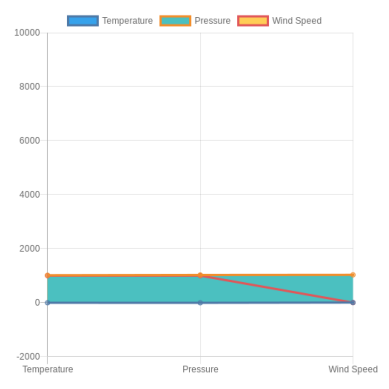

In [83]:
# Or show the chart in this notebook
# Send a GET request to the image URL and retrieve the image
response = requests.get(qc.get_short_url())
image = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()